## 1. Import Libs

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

import os
import matplotlib.pyplot as plt
%matplotlib inline

USE_CUDA = torch.cuda.is_available()

## 2. Prepare dataset

In [2]:
result_dir = './save_results/exercise'

if not os.path.exists(result_dir):
    os.mkdir(result_dir)

Text(0,0.5,'y1')

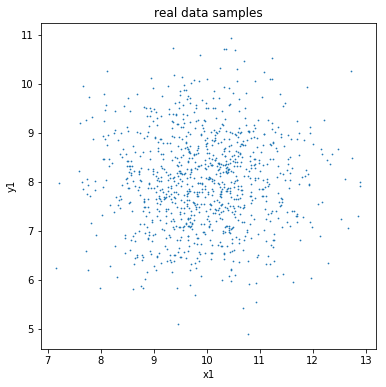

In [3]:
def sample_real(batch_size = 100):
    x = torch.randn(batch_size, 2) # x ~ N(mu=0, std=1)
    x[:, 0] += 10
    x[:, 1] += 8
    return x

plt.figure(figsize=(6,6))
x = sample_real(1000).numpy()
plt.scatter(x[:, 0], x[:, 1], 0.5)
plt.title('real data samples')
plt.xlabel('x1')
plt.ylabel('y1')

## 3. Build Model : GAN

In [4]:
D = nn.Sequential(
    nn.Linear(2, 10),
    nn.LeakyReLU(0.2),
    nn.Linear(10, 1),
    nn.Sigmoid()
)

z_dim = 10

G = nn.Sequential(
    nn.Linear(z_dim, 20),
    nn.LeakyReLU(0.2),
    nn.Linear(20, 2)
)

In [5]:
if USE_CUDA:
    D = D.cuda()
    G = G.cuda()

### utils

In [6]:
batch_size = 300

def plot_generator(epoch, batch_size=300, save_image=False):
    plt.figure(figsize=(5,5))
    
    z = torch.randn(batch_size, z_dim)
    
    if USE_CUDA:
        z = z.cuda()
        
    x_gen = G(z).data
    
    plt.scatter(x_gen[:, 0], x_gen[:, 1], 0.8)
    
    x_real = sample_real(batch_size).numpy()
    plt.scatter(x_real[:, 0], x_real[:, 1], 0.8)
    plt.title("epoch : %d"%(epoch))
    plt.legend(['GAN', 'Real Data'])
    
    plt.xlim([-1, 11])
    plt.ylim([-1, 11])
    
    if save_image:
        plt.savefig(result_dir + '/GAN_2d_sample_{}.png'.format(epoch))
    
    return x_gen.mean(0), x_gen.std(0)

## 4. Loss func & Optims

In [7]:
d_lr = 0.001
g_lr = 0.002

criterion = nn.MSELoss()
d_optimizer= torch.optim.Adam(D.parameters(), lr=d_lr)
g_optimizer= torch.optim.Adam(G.parameters(), lr=g_lr)

## 5. Train

Epoch [0/100000], d_loss: 0.8904, g_loss: 0.2251, D(x): 0.22, D(G(z)): 0.53


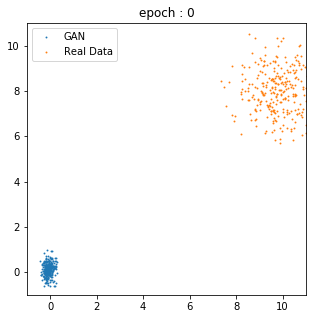

mean=tensor([-0.0760,  0.1177]), std=tensor([ 0.1423,  0.2838])
Epoch [2000/100000], d_loss: 0.4968, g_loss: 0.2564, D(x): 0.50, D(G(z)): 0.49
Epoch [4000/100000], d_loss: 0.5083, g_loss: 0.2547, D(x): 0.49, D(G(z)): 0.50
Epoch [6000/100000], d_loss: 0.4851, g_loss: 0.2465, D(x): 0.52, D(G(z)): 0.50
Epoch [8000/100000], d_loss: 0.5114, g_loss: 0.2542, D(x): 0.49, D(G(z)): 0.50
Epoch [10000/100000], d_loss: 0.5130, g_loss: 0.2364, D(x): 0.50, D(G(z)): 0.51


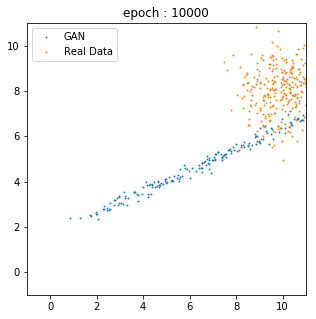

mean=tensor([ 10.4426,   6.5569]), std=tensor([ 6.2824,  2.8881])
Epoch [12000/100000], d_loss: 0.5006, g_loss: 0.2303, D(x): 0.52, D(G(z)): 0.52
Epoch [14000/100000], d_loss: 0.4995, g_loss: 0.2486, D(x): 0.50, D(G(z)): 0.50
Epoch [16000/100000], d_loss: 0.4997, g_loss: 0.2604, D(x): 0.49, D(G(z)): 0.49
Epoch [18000/100000], d_loss: 0.4997, g_loss: 0.2480, D(x): 0.50, D(G(z)): 0.50
Epoch [20000/100000], d_loss: 0.5003, g_loss: 0.2659, D(x): 0.49, D(G(z)): 0.49


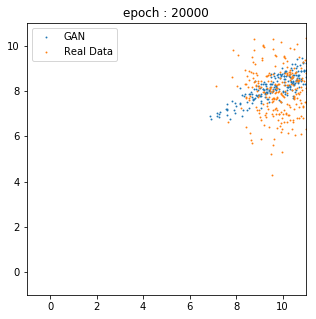

mean=tensor([ 10.5702,   8.6744]), std=tensor([ 1.7435,  0.9914])
Epoch [22000/100000], d_loss: 0.4951, g_loss: 0.2582, D(x): 0.51, D(G(z)): 0.50
Epoch [24000/100000], d_loss: 0.4827, g_loss: 0.2695, D(x): 0.50, D(G(z)): 0.48
Epoch [26000/100000], d_loss: 0.5029, g_loss: 0.2769, D(x): 0.47, D(G(z)): 0.47
Epoch [28000/100000], d_loss: 0.4346, g_loss: 0.2938, D(x): 0.53, D(G(z)): 0.46
Epoch [30000/100000], d_loss: 0.4980, g_loss: 0.2603, D(x): 0.50, D(G(z)): 0.49


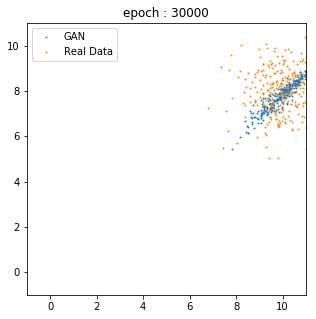

mean=tensor([ 10.1202,   7.9257]), std=tensor([ 0.8566,  0.7468])
Epoch [32000/100000], d_loss: 0.5508, g_loss: 0.1928, D(x): 0.52, D(G(z)): 0.56
Epoch [34000/100000], d_loss: 0.4935, g_loss: 0.2276, D(x): 0.53, D(G(z)): 0.53
Epoch [36000/100000], d_loss: 0.5352, g_loss: 0.2149, D(x): 0.50, D(G(z)): 0.54
Epoch [38000/100000], d_loss: 0.5025, g_loss: 0.2614, D(x): 0.49, D(G(z)): 0.49
Epoch [40000/100000], d_loss: 0.5002, g_loss: 0.2937, D(x): 0.46, D(G(z)): 0.46


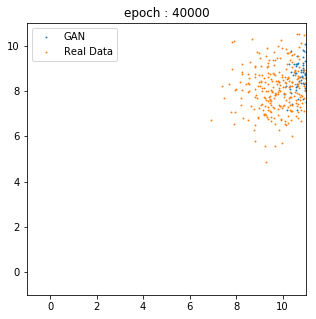

mean=tensor([ 12.0374,   9.4694]), std=tensor([ 1.3344,  1.4793])
Epoch [42000/100000], d_loss: 0.5001, g_loss: 0.2457, D(x): 0.50, D(G(z)): 0.50
Epoch [44000/100000], d_loss: 0.4975, g_loss: 0.2732, D(x): 0.48, D(G(z)): 0.48
Epoch [46000/100000], d_loss: 0.4933, g_loss: 0.2502, D(x): 0.51, D(G(z)): 0.51
Epoch [48000/100000], d_loss: 0.4921, g_loss: 0.3118, D(x): 0.46, D(G(z)): 0.44
Epoch [50000/100000], d_loss: 0.4977, g_loss: 0.2469, D(x): 0.51, D(G(z)): 0.50


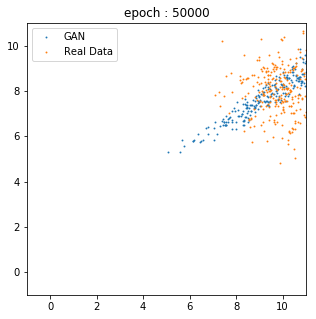

mean=tensor([ 9.9724,  8.2318]), std=tensor([ 1.8301,  1.3051])
Epoch [52000/100000], d_loss: 0.4991, g_loss: 0.2912, D(x): 0.46, D(G(z)): 0.46
Epoch [54000/100000], d_loss: 0.4918, g_loss: 0.2232, D(x): 0.54, D(G(z)): 0.53
Epoch [56000/100000], d_loss: 0.5147, g_loss: 0.2790, D(x): 0.46, D(G(z)): 0.47
Epoch [58000/100000], d_loss: 0.5222, g_loss: 0.2031, D(x): 0.53, D(G(z)): 0.55
Epoch [60000/100000], d_loss: 0.4729, g_loss: 0.2472, D(x): 0.53, D(G(z)): 0.50


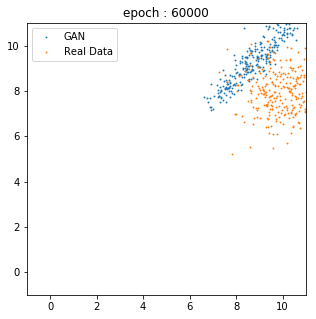

mean=tensor([ 9.0383,  9.6709]), std=tensor([ 1.1735,  1.2964])
Epoch [62000/100000], d_loss: 0.4933, g_loss: 0.2520, D(x): 0.51, D(G(z)): 0.50
Epoch [64000/100000], d_loss: 0.5149, g_loss: 0.2646, D(x): 0.47, D(G(z)): 0.49
Epoch [66000/100000], d_loss: 0.5392, g_loss: 0.2339, D(x): 0.48, D(G(z)): 0.52
Epoch [68000/100000], d_loss: 0.5259, g_loss: 0.2093, D(x): 0.52, D(G(z)): 0.54
Epoch [70000/100000], d_loss: 0.5011, g_loss: 0.2410, D(x): 0.51, D(G(z)): 0.51


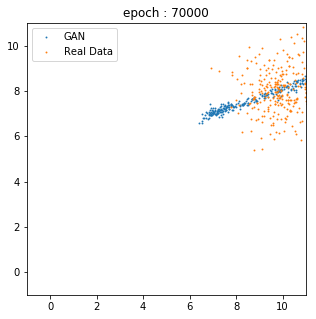

mean=tensor([ 9.6581,  7.9638]), std=tensor([ 2.4378,  0.8680])
Epoch [72000/100000], d_loss: 0.5072, g_loss: 0.2398, D(x): 0.50, D(G(z)): 0.51
Epoch [74000/100000], d_loss: 0.5035, g_loss: 0.2850, D(x): 0.47, D(G(z)): 0.47
Epoch [76000/100000], d_loss: 0.5002, g_loss: 0.2569, D(x): 0.49, D(G(z)): 0.49
Epoch [78000/100000], d_loss: 0.4957, g_loss: 0.2577, D(x): 0.50, D(G(z)): 0.49
Epoch [80000/100000], d_loss: 0.4893, g_loss: 0.2270, D(x): 0.54, D(G(z)): 0.52


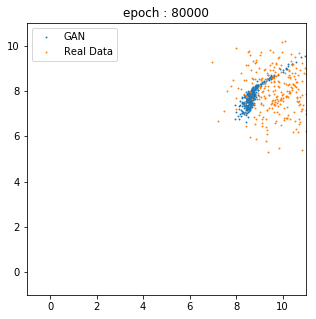

mean=tensor([ 8.7529,  7.8086]), std=tensor([ 0.5061,  0.5324])
Epoch [82000/100000], d_loss: 0.4907, g_loss: 0.2998, D(x): 0.47, D(G(z)): 0.45
Epoch [84000/100000], d_loss: 0.4894, g_loss: 0.2422, D(x): 0.52, D(G(z)): 0.51
Epoch [86000/100000], d_loss: 0.4912, g_loss: 0.2192, D(x): 0.54, D(G(z)): 0.53
Epoch [88000/100000], d_loss: 0.5311, g_loss: 0.2130, D(x): 0.51, D(G(z)): 0.54
Epoch [90000/100000], d_loss: 0.4956, g_loss: 0.2953, D(x): 0.47, D(G(z)): 0.46


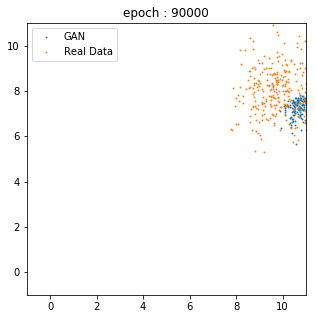

mean=tensor([ 11.4737,   7.5490]), std=tensor([ 0.9452,  0.4656])
Epoch [92000/100000], d_loss: 0.5016, g_loss: 0.2488, D(x): 0.50, D(G(z)): 0.50
Epoch [94000/100000], d_loss: 0.5067, g_loss: 0.2681, D(x): 0.48, D(G(z)): 0.48
Epoch [96000/100000], d_loss: 0.5008, g_loss: 0.2816, D(x): 0.47, D(G(z)): 0.47
Epoch [98000/100000], d_loss: 0.5054, g_loss: 0.2434, D(x): 0.50, D(G(z)): 0.51
Epoch [100000/100000], d_loss: 0.4246, g_loss: 0.3217, D(x): 0.51, D(G(z)): 0.43


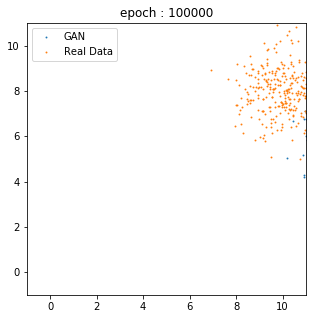

mean=tensor([ 12.3732,   7.3247]), std=tensor([ 0.9831,  1.2705])


In [8]:
num_epoch = 100000

for epoch in range(num_epoch + 1):
    x = sample_real(batch_size)
            
    real_labels = torch.ones(batch_size, 1)
    fake_labels = torch.zeros(batch_size, 1)
    
    if USE_CUDA:
        x = x.cuda()
        real_labels = real_labels.cuda()
        fake_labels = fake_labels.cuda()
        
    ############### 1. Train the discriminator ###############
    # Compute BCE_Loss using real images where BCE_Loss(x, y) : - y * log(D(x)) - (1-y) * log(1 - D(x))
    # Second tern of the loss s alwats zero since real_labels == 1
    outputs = D(x)
    d_loss_real = criterion(outputs, real_labels)
    real_score = outputs
    
    # Compute BCE_Loss using fake images
    # First term of the loss is always zero since fake_labels == 0
    z = torch.randn(batch_size, z_dim)
    
    if USE_CUDA:
        z = z.cuda()
        
    fake_images = G(z).detach()
    outputs  = D(fake_images)
    d_loss_fake = criterion(outputs, fake_labels)
    fake_score = outputs
    
    # Backpropagation + Opimization
    d_loss = d_loss_real + d_loss_fake
    D.zero_grad() # Zero gradient Container
    d_loss.backward() # Compute gradient
    d_optimizer.step() # gradient update
    
    
    ############### 2. Train the generator ###############
    z = torch.randn(batch_size, z_dim)
    
    if USE_CUDA:
        z = z.cuda()
    
    fake_images = G(z)
    outputs = D(fake_images)
    
    # train G to maximize log(D(G(z))) instead of minizing log(1 - D(G(z)))
    g_loss = criterion(outputs, real_labels) # genetor는 fake_image를 real이 것으로 학습
    
    # Backpropagation + Optimization
    D.zero_grad()
    G.zero_grad()
    g_loss.backward()
    g_optimizer.step()
    
    if epoch % 2000 == 0:
        print('Epoch [%d/%d], d_loss: %.4f, g_loss: %.4f, D(x): %.2f, D(G(z)): %.2f'
              %(epoch, num_epoch, d_loss.item(), g_loss.item(), real_score.data.mean(), fake_score.data.mean()))

    if epoch % 10000==0:
        mean, std = plot_generator(epoch, batch_size=300, save_image=True)
        plt.show()
        print('mean={}, std={}'.format(mean, std))

## 6. Display Results

In [9]:
import imageio

images = []
for epoch in range(num_epoch + 1):
    try:
        img_name = result_dir + '/GAN_2d_sample_{}.png'.format(epoch)
        images.append(imageio.imread(img_name))
    except:
        pass

imageio.mimsave(result_dir + '/GAN_2d_sample_total.gif', images, fps=3)

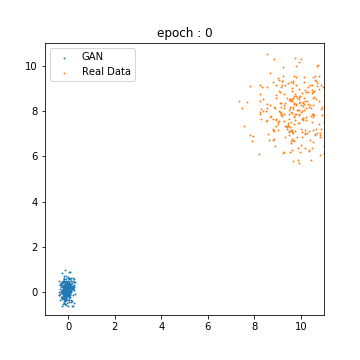

In [10]:
from IPython.display import Image

with open(result_dir + '/GAN_2d_sample_total.gif','rb') as f:
    display(Image(data=f.read(), format='gif'))